In [1]:
import numpy as np
import caiman as cm
from caiman.motion_correction import MotionCorrect
import matplotlib.pyplot as plt

In [2]:
# Loading movie
movie = cm.load('../data/Sue_2x_3000_40_-46.tif')

In [16]:
movie.play()

In [17]:
mc = MotionCorrect(movie)
m_els = mc.motion_correct(save_movie=True)
m_rig = cm.load(mc.mmap_file)

c:\Users\sangeetha\anaconda3\envs\caiman\lib\site-packages\caiman\motion_correction.py:3118: RuntimeWarning: Mean of empty slice
  new_temp = np.nanmean(mc, 0)
100%|██████████| 1/1 [00:00<00:00,  4.22it/s]


In [18]:
m_rig.play()

Text(0.5, 1.0, 'Motion corrected')

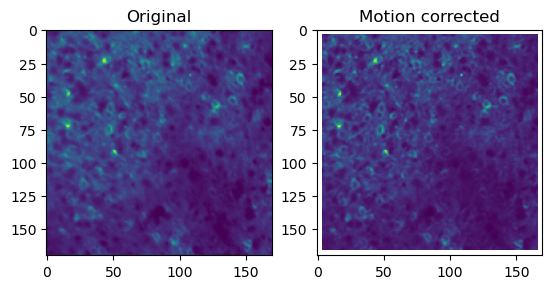

In [19]:
plt.subplot(121)
plt.imshow(np.median(movie, axis=0))
plt.title("Original")

plt.subplot(122)
plt.imshow(np.median(m_rig, axis=0))
plt.title("Motion corrected")

Text(0.5, 1.0, 'Motion corrected')

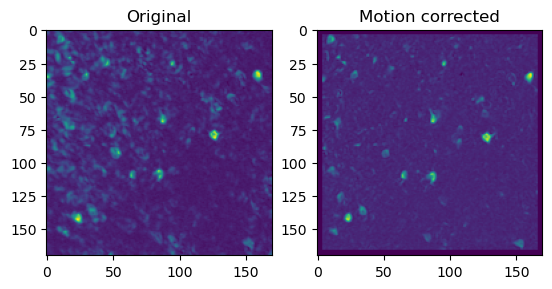

In [20]:
corr_img_orig = cm.local_correlations(movie, swap_dim=False)
corr_img_orig[np.isnan(corr_img_orig)] = 0
corr_img_mcorr = cm.local_correlations(m_rig, swap_dim=False)
corr_img_mcorr[np.isnan(corr_img_mcorr)] = 0

plt.subplot(121)
plt.imshow(corr_img_orig)
plt.title("Original")

plt.subplot(122)
plt.imshow(corr_img_mcorr)
plt.title("Motion corrected")

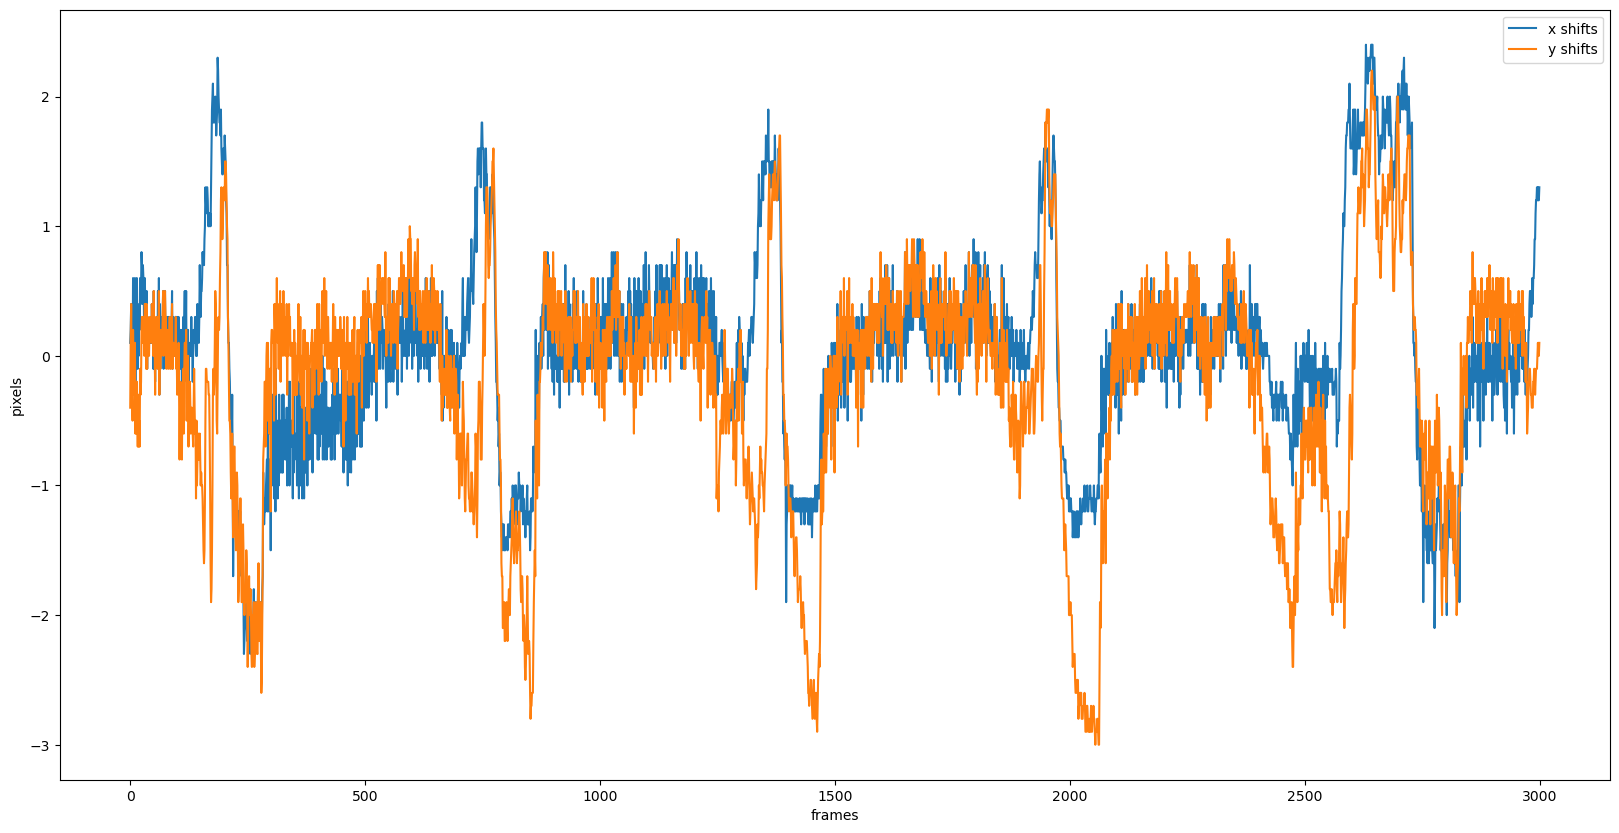

In [21]:
#%% plot rigid shifts
plt.close()
plt.figure(figsize = (20,10))
plt.plot(mc.shifts_rig)
plt.legend(['x shifts','y shifts'])
plt.xlabel('frames')
plt.ylabel('pixels');

In [ ]:
mc = MotionCorrect(movie)
m_els = mc.motion_correct(save_movie=True, )
m_rig = cm.load(mc.mmap_file)

In [7]:
MotionCorrect?


Init signature:
MotionCorrect(
    fname,
    min_mov=None,
    dview=None,
    max_shifts=(6, 6),
    niter_rig=1,
    splits_rig=14,
    num_splits_to_process_rig=None,
    strides=(96, 96),
    overlaps=(32, 32),
    splits_els=14,
    num_splits_to_process_els=None,
    upsample_factor_grid=4,
    max_deviation_rigid=3,
    shifts_opencv=True,
    nonneg_movie=True,
    gSig_filt=None,
    use_cuda=False,
    border_nan=True,
    pw_rigid=False,
    num_frames_split=80,
    var_name_hdf5='mov',
    is3D=False,
    indices=(slice(None, None, None), slice(None, None, None)),
)
Docstring:      class implementing motion correction operations
Init docstring:
 Constructor class for motion correction operations

 Args:
    fname: str
        path to file to motion correct

    min_mov: int16 or float32
        estimated minimum value of the movie to produce an output that is positive

    dview: ipyparallel view object list
        to perform parallel computing, if NOne will operate in si

Performing piece-wise rigid motion correction

In [23]:
mc = MotionCorrect(movie, pw_rigid=True)
m_els = mc.motion_correct(save_movie=True)
m_rig = cm.load(mc.fname_tot_els)

c:\Users\sangeetha\anaconda3\envs\caiman\lib\site-packages\caiman\motion_correction.py:3118: RuntimeWarning: Mean of empty slice
  new_temp = np.nanmean(mc, 0)
100%|██████████| 1/1 [00:00<00:00,  4.57it/s]


In [24]:
m_rig.play()

Text(0.5, 1.0, 'Motion corrected')

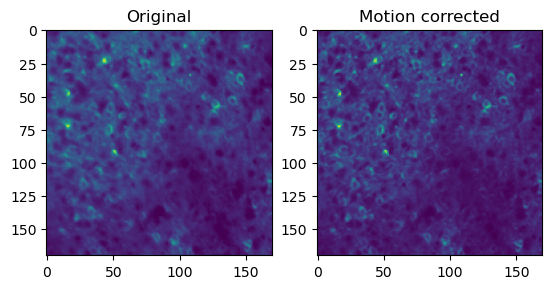

In [25]:
plt.subplot(121)
plt.imshow(np.median(movie, axis=0))
plt.title("Original")

plt.subplot(122)
plt.imshow(np.median(m_rig, axis=0))
plt.title("Motion corrected")

Text(0.5, 1.0, 'Motion corrected')

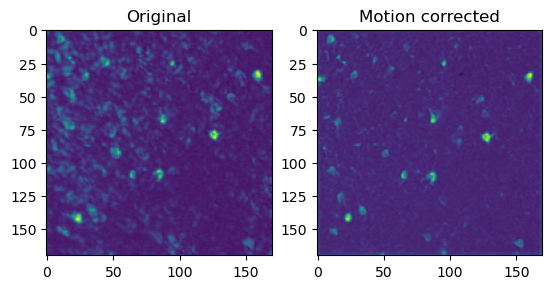

In [26]:
corr_img_orig = cm.local_correlations(movie, swap_dim=False)
corr_img_orig[np.isnan(corr_img_orig)] = 0
corr_img_mcorr = cm.local_correlations(m_rig, swap_dim=False)
corr_img_mcorr[np.isnan(corr_img_mcorr)] = 0

plt.subplot(121)
plt.imshow(corr_img_orig)
plt.title("Original")

plt.subplot(122)
plt.imshow(corr_img_mcorr)
plt.title("Motion corrected")

Text(0.5, 0, 'frames')

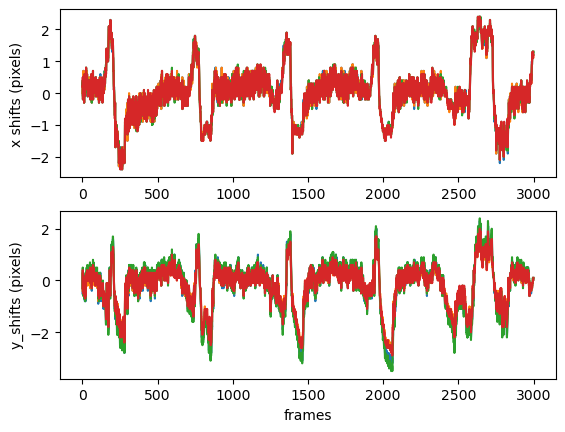

In [27]:
plt.subplot(2, 1, 1)
plt.plot(mc.x_shifts_els)
plt.ylabel('x shifts (pixels)')
plt.subplot(2, 1, 2)
plt.plot(mc.y_shifts_els)
plt.ylabel('y_shifts (pixels)')
plt.xlabel('frames')